In [1]:
import pandas as pd
#load /Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/tfs_retrieve_from_epitome/results/all_hits_combined.csv

df = pd.read_csv("/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/tfs_retrieve_from_epitome/rna_hits_combined.csv")
df

,grouping,gene,direction,hit_type,rna_pvalue,rna_log2fc,mean_group1,mean_group2,mean_log2fc,means_group1,means_group2
0,grouping_1_up,Bnc2,up,rna,5.435654e-79,NaN,NaN,NaN,5.044636,6.768893,1.724257
1,grouping_1_up,Cebpb,up,rna,6.942236e-08,NaN,NaN,NaN,1.237928,4.441980,3.204051
2,grouping_1_up,Creb3l4,up,rna,1.128975e-10,NaN,NaN,NaN,1.153871,1.978880,0.825008
3,grouping_1_up,Creb5,up,rna,1.109023e-55,NaN,NaN,NaN,3.962003,5.492053,1.530050
4,grouping_1_up,Dlx5,up,rna,1.142421e-16,NaN,NaN,NaN,1.362212,0.983886,-0.378326
...,...,...,...,...,...,...,...,...,...,...,...
339,grouping_8_down,Six3,down,rna,2.260120e-09,NaN,NaN,NaN,-1.326958,3.488674,4.815632
340,grouping_8_down,Sox11,down,rna,2.049947e-15,NaN,NaN,NaN,-1.960447,2.081642,4.042089
341,grouping_8_down,Stat5a,down,rna,2.396881e-05,NaN,NaN,NaN,-1.025528,3.866372,4.891900
342,grouping_8_down,Tbx6,down,rna,1.024309e-07,NaN,NaN,NaN,-1.017610,0.884258,1.901868


In [6]:
rna_res = df[df['hit_type'] == 'rna']
rna_res["grouping"].value_counts()

#if direction up make sure means_group1 > 1 else means_group2 > 1
print(df.shape)
rna_res= rna_res[((rna_res['direction'] == 'up') & (rna_res['means_group1'] > 1.5)) | ((rna_res['direction'] == 'down') & (rna_res['means_group2'] > 1.5))]
df = rna_res
print(df.shape)


(264, 11)
(264, 11)


In [7]:
# Initialize the new levels list
new_levels = []

# Collect analysis levels that include 'up'
for analysis in rna_res["grouping"].unique():
    if "up" in analysis:
        new_levels.append(analysis)

# Sort the levels alphabetically
new_levels = sorted(new_levels)

# Set the grouping column as a categorical variable with the ordered levels
rna_res["grouping"] = pd.Categorical(rna_res["grouping"], categories=new_levels, ordered=True)

# Sort the dataframe based on grouping levels
rna_res = rna_res.sort_values("grouping")

# Initialize a list to store results
output = []

# Loop over unique grouping levels
for analysis in rna_res["grouping"].unique():
    output.append(analysis)  # Add grouping level to the output list

    # Filter the dataframe for the current grouping level
    subset_rna_res = rna_res[rna_res["grouping"] == analysis]

    # Collect gene values for this analysis level
    genes = []
    for gene in subset_rna_res.sort_values('gene', ascending=True)["gene"].values:
        hit_type = subset_rna_res[subset_rna_res["gene"] == gene]["hit_type"].values[0]
        genes.append(gene)
    
    # Join the gene values as a comma-separated string and append it to the output
    output.append(", ".join(genes))
    output.append("")  # Add an empty string for separation between analysis levels

# Join all output into one string to display as a comma-separated list
final_output = "\n".join(output)

# Print the result (this simulates a text box or output area)
print(final_output)

grouping_1_down
Arnt2, Hsf4, Mzf1, Npas4, Prdm15, Prox1, Satb1, Zim3

grouping_1_up
Bnc2, Cebpb, Creb3l4, Creb5, Dmrta1, Dmrta2, Etv4, Fosl1, Foxc1, Hes1, Hey1, Hey2, Isl2, Jun, Jund, Klf13, Lmx1b, Mafb, Maff, Mafk, Mecom, Mef2b, Meis2, Msx1, Myc, Nfatc4, Nr1d1, Nr2f1, Nr2f2, Otx2, Pax6, Prrx1, Prrx2, Rarb, Rarg, Spdef, Tbx21, Tcf7l1, Tcf7l2, Tfeb, Tgif1, Tgif2

grouping_2_up
Foxl2, Foxo6, Foxp2, Gata2, Hes6, Irf8, Lhx4, Pitx1, Sox13, Sox5, Tcf7

grouping_3_up
Esrrb, Fos, Nr4a2, Prdm1, Zim3

grouping_4_down
Bcl11b, Bhlhe40, Bhlhe41, Bnc2, Creb5, Ebf1, Ebf3, Egr2, Elf4, Erf, Esr2, Ets1, Etv6, Foxo1, Grhl1, Hey1, Junb, Klf10, Klf13, Klf15, Klf2, Klf6, Klf9, Mlxip, Mybl1, Nfe2l2, Nfic, Nr1d1, Nr1d2, Onecut2, Pknox2, Plagl2, Prdm1, Prdm5, Rara, Rest, Rreb1, Runx2, Rxra, Smad3, Sox6, Stat3, Tfeb, Tgif1, Twist2, Usf2, Zbtb6

grouping_4_up
Creb3l2, E2f2, Elk3, Ets2, Etv3, Etv5, Fev, Foxp2, Gli2, Gli3, Glis3, Hsf2, Irf7, Klf3, Max, Mxi1, Mzf1, Nfkb2, Npas2, Nr2f1, Pou2f2, Pparg, Rarb, Rarg, Sc

In [8]:
rna_res[rna_res['gene'] == 'Tead4']

,grouping,gene,direction,hit_type,rna_pvalue,rna_log2fc,mean_group1,mean_group2,mean_log2fc,means_group1,means_group2


In [9]:
rna_res["grouping"].value_counts()

grouping
grouping_4_down    47
grouping_1_up      42
grouping_4_up      29
grouping_6_down    24
grouping_8_down    23
grouping_6_up      21
grouping_7_up      17
grouping_8_up      17
grouping_7_down    14
grouping_2_up      11
grouping_1_down     8
grouping_3_up       5
grouping_5_up       4
grouping_5_down     2
Name: count, dtype: int64

In [38]:
df = pd.read_csv("/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/tfs_retrieve_from_epitome/multimodal_hits_combined.csv")


In [39]:
#find wehre gene is Prop1
df[df['gene'] == 'Stat4']

,grouping,gene,direction,hit_type,atac_pvalue,rna_pvalue,atac_fold_enrichment,rna_log2fc,mean_group1,mean_group2,means_group1,means_group2
141,grouping_5_up,Stat4,up,multimodal,5.390338e-05,1.726995e-13,1.092326,1.472296,NaN,NaN,1.811755,0.339459
198,grouping_7_up,Stat4,up,multimodal,1.031126e-11,3.495059e-05,1.104302,0.925765,NaN,NaN,2.428932,1.503167


In [40]:
#prop1 is 2.4

(array([10.,  7., 13., 18., 19.,  7., 14.,  7., 10., 12., 12., 15., 10.,
        18., 14., 16., 11.,  6., 11., 10.,  4.,  8.,  4.,  7.,  3.,  1.,
         3.,  0.,  0.,  1.]),
 array([-7.85280153e-01, -3.97428139e-01, -9.57612359e-03,  3.78275891e-01,
         7.66127906e-01,  1.15397992e+00,  1.54183194e+00,  1.92968395e+00,
         2.31753597e+00,  2.70538798e+00,  3.09324000e+00,  3.48109201e+00,
         3.86894403e+00,  4.25679604e+00,  4.64464806e+00,  5.03250007e+00,
         5.42035209e+00,  5.80820410e+00,  6.19605612e+00,  6.58390813e+00,
         6.97176014e+00,  7.35961216e+00,  7.74746417e+00,  8.13531619e+00,
         8.52316820e+00,  8.91102022e+00,  9.29887223e+00,  9.68672425e+00,
         1.00745763e+01,  1.04624283e+01,  1.08502803e+01]),
 <BarContainer object of 30 artists>)

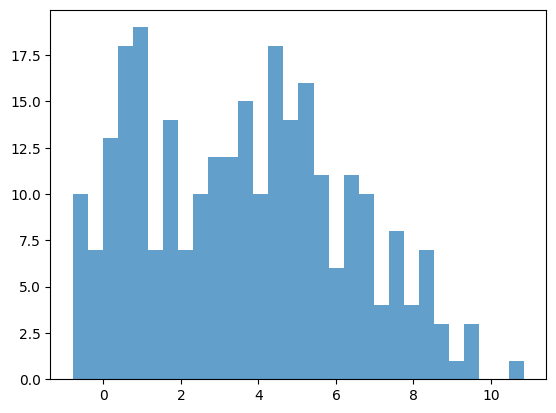

In [41]:
#hist of means_group1
import matplotlib.pyplot as plt
plt.hist(df['means_group1'], bins=30, alpha=0.7)

In [47]:
print(multimodal_res.shape)
multimodal_res= multimodal_res[((multimodal_res['direction'] == 'up') & (multimodal_res['means_group1'] > 1.5)) | ((multimodal_res['direction'] == 'down') & (multimodal_res['means_group2'] > 1.5))]
print(multimodal_res.shape)

(231, 12)
(215, 12)


In [49]:
multimodal_res = df[df['hit_type'] == 'multimodal']
multimodal_res["grouping"].value_counts()

grouping
grouping_1_up      43
grouping_4_up      34
grouping_4_down    30
grouping_7_up      23
grouping_8_up      23
grouping_8_down    18
grouping_6_up      17
grouping_6_down    17
grouping_1_down    11
grouping_7_down     6
grouping_3_up       3
grouping_2_up       2
grouping_5_up       2
grouping_2_down     1
grouping_5_down     1
Name: count, dtype: int64

In [48]:
# Initialize the new levels list
new_levels = []

# Collect analysis levels that include 'up'
for analysis in multimodal_res["grouping"].unique():
    if "up" in analysis:
        new_levels.append(analysis)

# Sort the levels alphabetically
new_levels = sorted(new_levels)

# Set the grouping column as a categorical variable with the ordered levels
multimodal_res["grouping"] = pd.Categorical(multimodal_res["grouping"], categories=new_levels, ordered=True)

# Sort the dataframe based on grouping levels
multimodal_res = multimodal_res.sort_values("grouping")

# Initialize a list to store results
output = []

# Loop over unique grouping levels
for analysis in multimodal_res["grouping"].unique():
    output.append(analysis)  # Add grouping level to the output list

    # Filter the dataframe for the current grouping level
    subset_multimodal_res = multimodal_res[multimodal_res["grouping"] == analysis]
    
    # Collect gene values for this analysis level
    genes = []
    for gene in subset_multimodal_res.sort_values('gene', ascending=True)["gene"].values:
        hit_type = subset_multimodal_res[subset_multimodal_res["gene"] == gene]["hit_type"].values[0]
        genes.append(gene)
    
    # Join the gene values as a comma-separated string and append it to the output
    output.append(", ".join(genes))
    output.append("")  # Add an empty string for separation between analysis levels

# Join all output into one string to display as a comma-separated list
final_output = "\n".join(output)

# Print the result (this simulates a text box or output area)
print(final_output)

grouping_1_down
Bhlha15, Esrrg, Insm1, Mitf, Onecut2, Pbx3, Plag1, Pou2f2, Rorb, Scrt1, Zeb1

grouping_1_up
Ar, Ebf1, Elf3, Ets1, Ets2, Etv6, Glis2, Grhl2, Hic2, Ikzf1, Irf1, Irf6, Irf9, Klf10, Klf11, Klf2, Klf3, Klf4, Klf5, Klf6, Nfia, Nfib, Nfix, Nfkb1, Prop1, Rela, Relb, Rest, Rfx4, Runx1, Six1, Six2, Six4, Sox2, Sox4, Sox6, Sox8, Sox9, Stat1, Stat6, Tead2, Tead3, Tead4

grouping_2_down
Klf5

grouping_2_up
Nhlh2, Nr5a1

grouping_3_up
Rorb, Tbx15, Tbx19

grouping_4_down
Arid5a, Barx2, Cebpd, Dbp, Esrrg, Foxl2, Gata2, Hif1a, Mecom, Mnx1, Myb, Neurod1, Nr3c1, Nr3c2, Pbx1, Pitx2, Pou6f2, Satb1, Srf, Stat1, Stat5a, Tcf7l1, Tcf7l2, Tef, Thra, Trps1

grouping_4_up
Ascl1, Bhlha15, Egr3, Egr4, Esr1, Etv1, Hes7, Hnf4g, Lhx3, Maf, Mef2c, Msx1, Nfatc1, Nfatc2, Nfia, Nfib, Nfix, Nr4a2, Pax6, Pax7, Pbx3, Plagl1, Prdm9, Prrx1, Sox11, Sox13, Sox2, Sox4, Srebf2, Tbx15, Tcf4, Tfdp1, Vax1

grouping_5_down
Six1

grouping_5_up
Pou1f1, Stat4

grouping_6_down
Cebpg, Gata2, Gli2, Hlf, Irf1, Lef1, Nr3c1, Nr

In [332]:
multimodal_res[multimodal_res['analysis']=="grouping_1_up"]

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,direction,log2fc,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2
13,MA0154.4,2786,4305,13.123557,10.7625,1.219378,3.255524e-60,Ebf1,4.345866e-59,grouping_1_up,up,2.152211,4.075962e-13,3.821471,2.158076,2.996042e-14,2.770097,grouping_1_up,1.0,multimodal,3.821471,1.663396
16,MA0473.3,3805,6142,17.923595,15.3550,1.167281,1.295765e-52,Elf1,1.513526e-51,grouping_1_up,up,1.544489,6.577795e-09,6.245623,1.103350,1.774357e-05,5.537725,grouping_1_up,1.0,multimodal,6.245623,5.142273
18,MA0640.2,3794,6069,17.871779,15.1725,1.177906,1.695834e-58,Elf3,2.160904e-57,grouping_1_up,up,2.599476,2.706828e-21,4.386956,3.189092,6.351855e-32,1.603613,grouping_1_up,1.0,multimodal,4.386956,1.197863
23,MA0098.3,872,1438,4.107589,3.5950,1.142584,2.356280e-09,Ets1,1.172563e-08,grouping_1_up,up,3.048015,2.022472e-31,4.461278,2.171369,7.220323e-21,3.279877,grouping_1_up,1.0,multimodal,4.461278,2.289909
24,MA1484.1,828,1436,3.900325,3.5900,1.086442,2.086153e-04,Ets2,8.236874e-04,grouping_1_up,up,1.738826,3.496975e-10,5.872229,1.493362,1.104823e-08,4.915005,grouping_1_up,1.0,multimodal,5.872229,4.378867
27,MA0645.1,1298,2148,6.114278,5.3700,1.138599,1.019331e-12,Etv6,5.495237e-12,grouping_1_up,up,1.343972,9.806696e-07,7.678677,1.069451,1.015994e-04,6.885289,grouping_1_up,1.0,multimodal,7.678677,6.609225
34,MA0736.1,867,1499,4.084036,3.7475,1.089803,8.788025e-05,Glis2,3.570401e-04,grouping_1_up,up,1.313961,4.804789e-07,4.485141,1.077681,3.521589e-05,3.348375,grouping_1_up,1.0,multimodal,4.485141,3.407460
36,MA1105.2,1739,2773,8.191625,6.9325,1.181626,1.598580e-26,Grhl2,1.139327e-25,grouping_1_up,up,4.717688,1.447290e-65,5.579374,4.726157,1.839894e-66,1.037000,grouping_1_up,1.0,multimodal,5.579374,0.853217
42,MA0484.2,1871,3153,8.813416,7.8825,1.118099,9.538129e-14,Hnf4g,5.277346e-13,grouping_1_up,up,0.738826,6.013474e-03,2.675056,2.109149,8.020202e-20,0.305583,grouping_1_up,1.0,multimodal,2.675056,0.565906
46,MA1508.1,4601,7751,21.673183,19.3775,1.118472,1.708949e-35,Ikzf1,1.381948e-34,grouping_1_up,up,1.371732,3.586664e-07,1.401822,1.614105,7.057436e-10,0.090292,grouping_1_up,1.0,multimodal,1.401822,-0.212283


In [311]:
#find Prop1 in gene
min_expr = df[df['gene'].str.contains('Prop1')]["AveExpr"].values[0]
#keep only those with at least this much
df = df[df['AveExpr'] >= min_expr]
#for those that are hit_type RNA, keep only if mean_log2fc > 1
df = df[(df['hit_type'] != 'rna') | (df['mean_log2fc'] > 1)]
#for those where hit_type ATAC, fold.enrichment > 1.05
df = df[(df['hit_type'] != 'atac') | (df['fold.enrichment'] > 1.05)]
df

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,direction,log2fc,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2
0,MA0007.3,1251,2072,5.892882,5.1800,1.137622,3.705527e-12,Ar,1.972372e-11,grouping_1_up,up,NaN,NaN,8.340262,NaN,NaN,NaN,grouping_1_up,NaN,atac,8.340262,6.603613
1,MA0605.2,524,1360,2.468322,3.4000,0.725977,1.000000e+00,Atf3,1.000000e+00,grouping_1_up,up,1.325080,1.068493e-03,3.776679,1.688488,9.484792e-06,4.588344,grouping_1_up,1.0,rna,3.776679,2.088191
2,MA1101.2,866,3546,4.079325,8.8650,0.460161,1.000000e+00,Bach2,1.000000e+00,grouping_1_up,up,2.403509,6.088930e-17,6.018327,1.857427,5.444261e-12,4.868622,grouping_1_up,1.0,rna,6.018327,4.160900
3,MA1928.1,1693,5865,7.974940,14.6625,0.543900,1.000000e+00,Bnc2,1.000000e+00,grouping_1_up,up,4.354417,1.883486e-46,5.542901,4.223424,2.680392e-44,1.671872,grouping_1_up,1.0,rna,5.542901,1.319477
5,MA0466.3,125,282,0.588817,0.7050,0.835202,9.986967e-01,Cebpb,1.000000e+00,grouping_1_up,up,1.494001,4.492091e-07,5.727080,1.639926,8.496798e-09,5.587163,grouping_1_up,1.0,rna,5.727080,4.087154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,MA0694.1,265,968,2.972185,2.4200,1.228176,9.703638e-05,Zbtb7b,3.067955e-04,grouping_8_down,down,NaN,NaN,2.615967,NaN,NaN,NaN,grouping_8_down,NaN,atac,2.645083,2.615967
1743,MA0103.3,1406,5199,15.769403,12.9975,1.213264,2.735566e-18,Zeb1,2.300611e-17,grouping_8_down,down,NaN,NaN,7.721577,NaN,NaN,NaN,grouping_8_down,NaN,atac,7.131689,7.721577
1744,MA1972.1,1677,7094,18.808883,17.7350,1.060552,1.435154e-03,Zfp14,4.249874e-03,grouping_8_down,down,NaN,NaN,3.125517,NaN,NaN,NaN,grouping_8_down,NaN,atac,2.879740,3.125517
1745,MA0146.2,1058,3691,11.866308,9.2275,1.285972,1.163692e-21,Zfx,1.165078e-20,grouping_8_down,down,NaN,NaN,5.163710,NaN,NaN,NaN,grouping_8_down,NaN,atac,4.896588,5.163710


In [312]:
#for those where hit_type RNA, if there are multiple instances of gene, keep it only where geom_mean_adj_pval is the smallest
df = df.sort_values('geom_mean_adj_pval')
#only within RNA remove duplicates
df_rna = df[df['hit_type'] == 'rna']
df_rna = df_rna.drop_duplicates('gene')
df = pd.concat([df[df['hit_type'] != 'rna'], df_rna])


In [313]:
#where hit_type is ATAC, if there are multiple instances of gene, keep it only where p.adjust is smallest
df = df.sort_values('p.adjust')
#only within ATAC remove duplicates
df_atac = df[df['hit_type'] == 'atac']
df_atac = df_atac[df_atac['p.adjust'] > 10**-250]
#remove these indices from df
df = df.drop(df_atac.index)
df_atac = df_atac.drop_duplicates('gene')
df = pd.concat([df, df_atac])

In [314]:
#for multimodal, we keep only where 'geom_mean_adj_pval' is smallest
df = df.sort_values('geom_mean_adj_pval')
#only within multimodal remove duplicates
df_multi = df[df['hit_type'] == 'multimodal']
df_multi = df_multi.drop_duplicates('gene')
df = pd.concat([df[df['hit_type'] != 'multimodal'], df_multi])
df

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,direction,log2fc,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2
39,MA0649.1,402,875,1.893636,2.1875,0.865662,9.999915e-01,Hey2,1.000000e+00,grouping_1_up,up,5.225461,5.328080e-72,5.707248,5.227353,1.646156e-72,1.031531,grouping_1_up,1.0,rna,5.707248,0.479895
106,MA0075.3,520,1165,2.449479,2.9125,0.841023,1.000000e+00,Prrx2,1.000000e+00,grouping_1_up,up,4.940530,7.775765e-71,5.187565,4.907202,2.463993e-70,1.094505,grouping_1_up,1.0,rna,5.187565,0.280363
105,MA0716.1,689,1453,3.245560,3.6325,0.893478,9.999951e-01,Prrx1,1.000000e+00,grouping_1_up,up,1.833302,8.827016e-10,6.806437,5.059891,9.636953e-66,2.395429,grouping_1_up,1.0,rna,6.806437,1.746546
37,MA1099.2,398,720,1.874794,1.8000,1.041552,1.231962e-01,Hes1,3.969654e-01,grouping_1_up,up,5.585523,1.549303e-67,7.481691,5.424403,1.735401e-64,4.003438,grouping_1_up,1.0,rna,7.481691,2.057288
562,MA1491.2,1881,2399,5.577961,5.9975,0.930048,1.000000e+00,Gli3,1.000000e+00,grouping_4_up,up,5.338634,7.632513e-64,6.298960,5.338634,7.632513e-64,2.251088,grouping_4_up,1.0,rna,6.298960,0.960326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,MA0666.2,1091,1113,3.235277,2.7825,1.162723,2.325886e-54,Msx1,8.541790e-54,grouping_4_up,up,0.799915,1.671929e-02,5.256727,0.799915,1.671929e-02,4.776054,grouping_4_up,1.0,multimodal,5.256727,4.456812
543,MA0733.1,2009,2330,5.957535,5.8250,1.022753,4.272518e-03,Egr4,8.555208e-03,grouping_4_up,up,1.184319,1.765550e-02,2.733736,1.184319,1.765550e-02,1.152822,grouping_4_up,1.0,multimodal,2.733736,1.549417
1245,MA0157.3,1409,2843,7.709143,7.1075,1.084649,9.794034e-06,Foxo3,3.466807e-05,grouping_7_up,up,0.618512,4.146443e-02,5.602053,0.772584,1.815880e-02,5.237506,grouping_7_up,1.0,multimodal,5.602053,4.829469
841,MA1970.1,2050,2381,6.578314,5.9525,1.105135,1.120693e-25,Trps1,5.385729e-25,grouping_4_down,down,-0.758679,2.491715e-02,6.891181,-0.758679,2.491715e-02,7.131068,grouping_4_down,1.0,multimodal,6.132502,6.891181


In [315]:
#if the same tf is duplicate, keep where it is multimodal > RNA > ATAC
#first sort as multimodal > RNA > ATAC
df['hit_type'] = pd.Categorical(df['hit_type'], categories=['multimodal', 'rna', 'atac'], ordered=True)
df = df.sort_values(['hit_type','mean_log2fc','fold.enrichment'], ascending=[True, False, False])

#only keep top two occurences of each gene
df = df.groupby('gene').head(2)
df

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,direction,log2fc,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2
632,MA0680.2,2196,2118,6.512069,5.2950,1.229853,0.000000e+00,Pax7,0.000000e+00,grouping_4_up,up,7.471183,1.912061e-120,7.859380,7.471183,1.912061e-120,0.526240,grouping_4_up,1.0,multimodal,7.859380,0.388198
502,MA0804.1,459,1185,18.404170,2.9625,6.212378,3.768346e-247,Tbx19,3.169179e-244,grouping_3_up,up,5.690820,2.458766e-78,6.890053,5.924134,3.386627e-79,2.024420,grouping_3_up,1.0,multimodal,6.890053,0.965919
115,MA0002.2,2779,4600,13.090584,11.5000,1.138312,1.039024e-26,Runx1,7.468542e-26,grouping_1_up,up,4.370476,1.956540e-47,6.544189,4.977930,3.775497e-60,2.864906,grouping_1_up,1.0,multimodal,6.544189,1.566259
405,MA1540.2,1695,5043,28.081511,12.6075,2.227366,9.852464e-279,Nr5a1,2.761974e-277,grouping_2_up,up,5.561130,4.934213e-78,5.902773,4.920596,2.120797e-66,1.011178,grouping_2_up,1.0,multimodal,5.902773,0.982176
129,MA0077.1,1131,1578,5.327618,3.9450,1.350473,1.155866e-53,Sox9,1.408816e-52,grouping_1_up,up,3.493370,5.656196e-30,6.485145,4.737151,7.418307e-53,2.570493,grouping_1_up,1.0,multimodal,6.485145,1.747994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,MA1532.2,1840,2190,5.776536,5.4750,1.055075,4.269628e-08,Nr1d2,1.059220e-07,grouping_1_down,down,NaN,NaN,5.533207,NaN,NaN,NaN,grouping_1_down,NaN,atac,5.909299,5.533207
765,MA0495.3,2859,3483,9.174341,8.7075,1.053614,1.198835e-10,Maff,4.308633e-10,grouping_4_down,down,NaN,NaN,1.723956,NaN,NaN,NaN,grouping_4_down,NaN,atac,0.916945,1.723956
221,MA0737.1,1188,1416,3.729633,3.5400,1.053569,1.818775e-05,Glis3,4.014671e-05,grouping_1_down,down,NaN,NaN,5.549625,NaN,NaN,NaN,grouping_1_down,NaN,atac,7.169367,5.549625
160,MA1973.1,2184,3914,10.287814,9.7850,1.051386,1.674779e-04,Zkscan3,6.643817e-04,grouping_1_up,up,NaN,NaN,5.574280,NaN,NaN,NaN,grouping_1_up,NaN,atac,5.574280,5.762004


In [316]:
#add column called family, which is tf name up to last consecutive numbers
family = []
i=0
for gene in df["gene"].values:
    i += 1
    last_number = None
    for i, c in enumerate(gene):
        if c.isdigit():
            last_number = i
    
    if last_number is not None:
        for i in range(last_number-1, 0, -1):
            if gene[i].isdigit():
                last_number = i
        
        #change gene by removing the last number
        gene = gene[:last_number]
    family.append(gene)
    
df["family"] = family

In [317]:
#if rna, order by mean_log2fc and keep top 4 of each family
df_rna = df[df['hit_type'].isin(['rna','multimodal'])]
df_rna = df_rna.sort_values('mean_log2fc', ascending=False)
df_rna = df_rna.groupby(["analysis", "family"]).head(5)
df = pd.concat([df[~df['hit_type'].isin(['rna','multimodal'])], df_rna])

In [318]:
#if atac, order by fold.enrichment and keep top 4 of each family
df_atac = df[df['hit_type'].isin(['atac'])]
df_atac = df_atac.sort_values('fold.enrichment', ascending=False)
df_atac = df_atac.groupby(["analysis", "family"]).head(2)
df = pd.concat([df[~df['hit_type'].isin(['atac'])], df_atac])
df

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,direction,log2fc,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2,family
632,MA0680.2,2196,2118,6.512069,5.2950,1.229853,0.000000e+00,Pax7,0.000000e+00,grouping_4_up,up,7.471183,1.912061e-120,7.859380,7.471183,1.912061e-120,0.526240,grouping_4_up,1.0,multimodal,7.859380,0.388198,Pax
502,MA0804.1,459,1185,18.404170,2.9625,6.212378,3.768346e-247,Tbx19,3.169179e-244,grouping_3_up,up,5.690820,2.458766e-78,6.890053,5.924134,3.386627e-79,2.024420,grouping_3_up,1.0,multimodal,6.890053,0.965919,Tbx
37,MA1099.2,398,720,1.874794,1.8000,1.041552,1.231962e-01,Hes1,3.969654e-01,grouping_1_up,up,5.585523,1.549303e-67,7.481691,5.424403,1.735401e-64,4.003438,grouping_1_up,1.0,rna,7.481691,2.057288,Hes
562,MA1491.2,1881,2399,5.577961,5.9975,0.930048,1.000000e+00,Gli3,1.000000e+00,grouping_4_up,up,5.338634,7.632513e-64,6.298960,5.338634,7.632513e-64,2.251088,grouping_4_up,1.0,rna,6.298960,0.960326,Gli
39,MA0649.1,402,875,1.893636,2.1875,0.865662,9.999915e-01,Hey2,1.000000e+00,grouping_1_up,up,5.225461,5.328080e-72,5.707248,5.227353,1.646156e-72,1.031531,grouping_1_up,1.0,rna,5.707248,0.479895,Hey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,MA1616.1,3645,4095,10.808967,10.2375,1.055821,5.572937e-20,Prdm15,1.546812e-19,grouping_4_up,up,NaN,NaN,4.245573,NaN,NaN,NaN,grouping_4_up,NaN,atac,4.245573,3.747651,Prdm
765,MA0495.3,2859,3483,9.174341,8.7075,1.053614,1.198835e-10,Maff,4.308633e-10,grouping_4_down,down,NaN,NaN,1.723956,NaN,NaN,NaN,grouping_4_down,NaN,atac,0.916945,1.723956,Maff
221,MA0737.1,1188,1416,3.729633,3.5400,1.053569,1.818775e-05,Glis3,4.014671e-05,grouping_1_down,down,NaN,NaN,5.549625,NaN,NaN,NaN,grouping_1_down,NaN,atac,7.169367,5.549625,Glis
160,MA1973.1,2184,3914,10.287814,9.7850,1.051386,1.674779e-04,Zkscan3,6.643817e-04,grouping_1_up,up,NaN,NaN,5.574280,NaN,NaN,NaN,grouping_1_up,NaN,atac,5.574280,5.762004,Zkscan


In [319]:
#for a final set op top hits, let's perform the last filtering. Keep only those where mean_log2fc > 2 or fold.enrichment > 1.2
df = df[(df['mean_log2fc'] > 2) | (df['fold.enrichment'] > 1.15)]
#and also AveExpr > 5
df = df[df['AveExpr'] > 4]
df

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,direction,log2fc,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2,family
632,MA0680.2,2196,2118,6.512069,5.2950,1.229853,0.000000e+00,Pax7,0.000000e+00,grouping_4_up,up,7.471183,1.912061e-120,7.859380,7.471183,1.912061e-120,0.526240,grouping_4_up,1.0,multimodal,7.859380,0.388198,Pax
502,MA0804.1,459,1185,18.404170,2.9625,6.212378,3.768346e-247,Tbx19,3.169179e-244,grouping_3_up,up,5.690820,2.458766e-78,6.890053,5.924134,3.386627e-79,2.024420,grouping_3_up,1.0,multimodal,6.890053,0.965919,Tbx
37,MA1099.2,398,720,1.874794,1.8000,1.041552,1.231962e-01,Hes1,3.969654e-01,grouping_1_up,up,5.585523,1.549303e-67,7.481691,5.424403,1.735401e-64,4.003438,grouping_1_up,1.0,rna,7.481691,2.057288,Hes
562,MA1491.2,1881,2399,5.577961,5.9975,0.930048,1.000000e+00,Gli3,1.000000e+00,grouping_4_up,up,5.338634,7.632513e-64,6.298960,5.338634,7.632513e-64,2.251088,grouping_4_up,1.0,rna,6.298960,0.960326,Gli
39,MA0649.1,402,875,1.893636,2.1875,0.865662,9.999915e-01,Hey2,1.000000e+00,grouping_1_up,up,5.225461,5.328080e-72,5.707248,5.227353,1.646156e-72,1.031531,grouping_1_up,1.0,rna,5.707248,0.479895,Hey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,MA0631.1,1026,1131,3.292366,2.8275,1.164409,6.825132e-31,Six3,3.457793e-30,grouping_4_down,down,NaN,NaN,4.573898,NaN,NaN,NaN,grouping_4_down,NaN,atac,7.145647,4.573898,Six
637,MA1615.1,4111,4190,12.190855,10.4750,1.163805,4.387168e-215,Plagl1,2.427374e-214,grouping_4_up,up,NaN,NaN,7.066849,NaN,NaN,NaN,grouping_4_up,NaN,atac,7.066849,6.637890,Plagl
189,MA0755.1,485,527,1.522620,1.3175,1.155688,2.983891e-15,Cux2,9.651738e-15,grouping_1_down,down,NaN,NaN,5.221026,NaN,NaN,NaN,grouping_1_down,NaN,atac,4.749836,5.221026,Cux
1452,MA0070.1,1408,1704,4.901995,4.2600,1.150703,1.583045e-26,Pbx1,6.024167e-26,grouping_7_down,down,NaN,NaN,8.471925,NaN,NaN,NaN,grouping_7_down,NaN,atac,8.525503,8.471925,Pbx


In [320]:
df[df["analysis"]=='grouping_1_up'].sort_values('gene', ascending=False)["gene"].values

array(['Zfx', 'Zbtb7a', 'Tgif1', 'Tfcp2', 'Tead1', 'Tcf7l2', 'Tcf7l1',
       'Stat3', 'Sp3', 'Sox9', 'Sox6', 'Sox5', 'Sox4', 'Sox2', 'Sox11',
       'Smad2', 'Six4', 'Six2', 'Six1', 'Runx1', 'Rfx4', 'Rest', 'Rela',
       'Rbpj', 'Rarb', 'Prrx2', 'Prrx1', 'Pax6', 'Nr2f2', 'Nfix', 'Nfic',
       'Nfib', 'Nfia', 'Msx1', 'Meis2', 'Mecom', 'Mafb', 'Klf7', 'Klf6',
       'Klf5', 'Klf4', 'Klf2', 'Klf12', 'Jun', 'Irf6', 'Hsf2', 'Hey2',
       'Hey1', 'Hes1', 'Grhl2', 'Ets1', 'Elf3', 'Elf1', 'Creb5', 'Bnc2'],
      dtype=object)

In [321]:
new_levels

['grouping_1_down',
 'grouping_1_up',
 'grouping_2_down',
 'grouping_2_up',
 'grouping_3_up',
 'grouping_4_down',
 'grouping_4_up',
 'grouping_5_up',
 'grouping_6_down',
 'grouping_6_up',
 'grouping_7_down',
 'grouping_7_up',
 'grouping_8_down',
 'grouping_8_up']

In [322]:
# Initialize the new levels list
new_levels = []

# Collect analysis levels that include 'up'
for analysis in df["analysis"].unique():
    if "up" in analysis:
        new_levels.append(analysis)

# Sort the levels alphabetically
new_levels = sorted(new_levels)

# Set the analysis column as a categorical variable with the ordered levels
df["analysis"] = pd.Categorical(df["analysis"], categories=new_levels, ordered=True)

# Sort the dataframe based on analysis levels
df = df.sort_values("analysis")

# Initialize a list to store results
output = []

# Loop over unique analysis levels
for analysis in df["analysis"].unique():
    output.append(analysis)  # Add analysis level to the output list
    
    # Filter the dataframe for the current analysis level
    subset_df = df[df["analysis"] == analysis]
    
    # Collect gene values for this analysis level
    genes = []
    for gene in subset_df.sort_values('gene', ascending=True)["gene"].values:
        hit_type = subset_df[subset_df["gene"] == gene]["hit_type"].values[0]
        
        if hit_type == "multimodal":
            genes.append(f"**{gene}**")  # Bold the gene when hit_type is "multimodal"
        elif hit_type == "atac":
            genes.append(f"*{gene}*")  # Italicize the gene when hit_type is "atac"
        else:
            genes.append(gene)  # Add regular gene to list
    
    # Join the gene values as a comma-separated string and append it to the output
    output.append(", ".join(genes))
    output.append("")  # Add an empty string for separation between analysis levels

# Join all output into one string to display as a comma-separated list
final_output = "\n".join(output)

# Print the result (this simulates a text box or output area)
print(final_output)


grouping_1_down
*Ascl1*, *Creb1*, *Crem*, *Cux2*, *Egr1*, *Gmeb1*, *Mafg*, *Mef2d*, *Nfe2l2*, *Nr4a1*, *Nr4a2*, *Nrf1*, *Pknox2*, *Rfx3*, *Rora*, **Rorb**, *Tcf4*, *Tfdp1*, *Xbp1*, **Zeb1**

grouping_1_up
Bnc2, Creb5, **Elf1**, **Elf3**, **Ets1**, **Grhl2**, Hes1, Hey1, Hey2, *Hsf2*, **Irf6**, Jun, *Klf12*, **Klf2**, **Klf4**, **Klf5**, **Klf6**, *Klf7*, Mafb, Mecom, Meis2, Msx1, **Nfia**, **Nfib**, *Nfic*, **Nfix**, Nr2f2, Pax6, Prrx1, Prrx2, Rarb, *Rbpj*, *Rela*, **Rest**, **Rfx4**, **Runx1**, **Six1**, **Six2**, **Six4**, *Smad2*, *Sox11*, **Sox2**, **Sox4**, *Sox5*, **Sox6**, **Sox9**, *Sp3*, *Stat3*, Tcf7l1, Tcf7l2, *Tead1*, *Tfcp2*, Tgif1, *Zbtb7a*, *Zfx*

grouping_2_down
**Hlf**, **Rfx2**

grouping_2_up
*Esrrg*, *Fos*, Foxl2, Foxp2, *Jun*, **Nhlh2**, **Nr5a1**, *Nr6a1*, Sox5, *Tcf3*

grouping_3_up
*Mga*, **Tbx19**

grouping_4_down
*Ar*, *Atf4*, **Cebpd**, *Cebpg*, **Dbp**, *Gmeb2*, *Hlf*, **Neurod1**, **Nfil3**, **Nr3c1**, *Pitx1*, *Pitx2*, *Rorb*, *Rorc*, *Satb1*, *Six3*, *Tbx1

In [323]:
# Initialize the new levels list
new_levels = []

# Collect analysis levels that include 'up'
for analysis in df["analysis"].unique():
    if "up" in analysis:
        new_levels.append(analysis)

# Sort the levels alphabetically
new_levels = sorted(new_levels)

# Set the analysis column as a categorical variable with the ordered levels
df["analysis"] = pd.Categorical(df["analysis"], categories=new_levels, ordered=True)

# Sort the dataframe based on analysis levels
df = df.sort_values("analysis")

# Initialize a list to store results
output = []

# Loop over unique analysis levels
for analysis in df["analysis"].unique():
    output.append(analysis)  # Add analysis level to the output list
    
    # Filter the dataframe for the current analysis level
    subset_df = df[df["analysis"] == analysis]
    
    # Collect gene values for this analysis level
    genes = []
    for gene in subset_df.sort_values('gene', ascending=True)["gene"].values:
        hit_type = subset_df[subset_df["gene"] == gene]["hit_type"].values[0]
        
        if hit_type == "multimodal":
            genes.append(f"**{gene}**")  # Bold the gene when hit_type is "multimodal"
        elif hit_type == "rna":
            genes.append(gene)  # Add regular gene to list
    
    # Join the gene values as a comma-separated string and append it to the output
    output.append(", ".join(genes))
    output.append("")  # Add an empty string for separation between analysis levels

# Join all output into one string to display as a comma-separated list
final_output = "\n".join(output)

# Print the result (this simulates a text box or output area)
print(final_output)

grouping_1_down
**Rorb**, **Zeb1**

grouping_1_up
Bnc2, Creb5, **Elf1**, **Elf3**, **Ets1**, **Grhl2**, Hes1, Hey1, Hey2, **Irf6**, Jun, **Klf2**, **Klf4**, **Klf5**, **Klf6**, Mafb, Mecom, Meis2, Msx1, **Nfia**, **Nfib**, **Nfix**, Nr2f2, Pax6, Prrx1, Prrx2, Rarb, **Rest**, **Rfx4**, **Runx1**, **Six1**, **Six2**, **Six4**, **Sox2**, **Sox4**, **Sox6**, **Sox9**, Tcf7l1, Tcf7l2, Tgif1

grouping_2_down
**Hlf**, **Rfx2**

grouping_2_up
Foxl2, Foxp2, **Nhlh2**, **Nr5a1**, Sox5

grouping_3_up
**Tbx19**

grouping_4_down
**Cebpd**, **Dbp**, **Neurod1**, **Nfil3**, **Nr3c1**, **Tef**

grouping_4_up
Gli3, **Mef2c**, **Msx1**, **Pax7**, **Prrx1**, **Rfx7**, Six3, **Sox11**

grouping_5_up
**Pou1f1**, Rxrg

grouping_6_down
**Gata2**, **Irf1**, **Rxrg**

grouping_6_up
**Ascl1**, Myb, **Pou6f2**

grouping_7_down
**Lhx3**

grouping_7_up
**Gli2**, **Glis3**, **Nr3c2**, **Rarb**, Rfx4

grouping_8_down
**Fosl2**

grouping_8_up
**Foxl2**, **Foxp2**, **Isl1**, **Lef1**



In [324]:
df[df["analysis"]=="grouping_1_up"].sort_values('gene', ascending=False)["gene"].values

array(['Zfx', 'Zbtb7a', 'Tgif1', 'Tfcp2', 'Tead1', 'Tcf7l2', 'Tcf7l1',
       'Stat3', 'Sp3', 'Sox9', 'Sox6', 'Sox5', 'Sox4', 'Sox2', 'Sox11',
       'Smad2', 'Six4', 'Six2', 'Six1', 'Runx1', 'Rfx4', 'Rest', 'Rela',
       'Rbpj', 'Rarb', 'Prrx2', 'Prrx1', 'Pax6', 'Nr2f2', 'Nfix', 'Nfic',
       'Nfib', 'Nfia', 'Msx1', 'Meis2', 'Mecom', 'Mafb', 'Klf7', 'Klf6',
       'Klf5', 'Klf4', 'Klf2', 'Klf12', 'Jun', 'Irf6', 'Hsf2', 'Hey2',
       'Hey1', 'Hes1', 'Grhl2', 'Ets1', 'Elf3', 'Elf1', 'Creb5', 'Bnc2'],
      dtype=object)

In [1]:
# Getting RNA only hits

In [ ]:
#/Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim\ 1/tfs_retrieve_from_epitome/results/rna_hits_combined.csv
import pandas as pd
rna_only = pd.read_csv('/Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim 1/tfs_retrieve_from_epitome/results/_hits_combined.csv')
rna_only["grouping"].value_counts()

grouping
grouping_1_down    202
grouping_4_up      189
grouping_7_up      181
grouping_1_up      162
grouping_8_down    147
grouping_4_down    140
grouping_6_down    126
grouping_8_up      118
grouping_6_up      106
grouping_7_down     97
grouping_2_up       77
grouping_5_up       68
grouping_5_down     57
grouping_3_up       50
grouping_2_down     20
grouping_3_down      7
Name: count, dtype: int64

In [6]:
rna_only[rna_only["grouping"]=='grouping_1_up'].sort_values('rna_pvalue', ascending=True)["gene"].values

KeyError: 'rna_pvalue'

In [17]:
rna_only[rna_only["grouping"]=='grouping_5_down'].sort_values('gene', ascending=True)["gene"].values

array(['Zbtb18'], dtype=object)

In [9]:
all = pd.read_csv('/Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim 1/tfs_retrieve_from_epitome/results/all_hits_combined.csv')
all["grouping"].value_counts()

grouping
grouping_1_down    202
grouping_4_up      189
grouping_7_up      181
grouping_1_up      162
grouping_8_down    147
grouping_4_down    140
grouping_6_down    126
grouping_8_up      118
grouping_6_up      106
grouping_7_down     97
grouping_2_up       77
grouping_5_up       68
grouping_5_down     57
grouping_3_up       50
grouping_2_down     20
grouping_3_down      7
Name: count, dtype: int64

In [11]:
#keep where hit_type is multimodal or rna
all = all[all["hit_type"].isin(["multimodal", "rna"])]
#keep where grouping is 1 up
all = all[all["grouping"]=='grouping_1_up']
all

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue_x,gene,p.adjust,analysis,...,pvalue_y,AveExpr,mean_log2fc,geom_mean_adj_pval,mean_AvgExpr,grouping,TF,hit_type,means_group1,means_group2
1,MA0605.2,524,1360,2.468322,3.4000,0.725977,1.000000,Atf3,1.0,grouping_1_up,...,1.068493e-03,3.776679,1.688488,9.484792e-06,4.588344,grouping_1_up,1.0,rna,3.776679,2.088191
2,MA1101.2,866,3546,4.079325,8.8650,0.460161,1.000000,Bach2,1.0,grouping_1_up,...,6.088930e-17,6.018327,1.857427,5.444261e-12,4.868622,grouping_1_up,1.0,rna,6.018327,4.160900
3,MA1928.1,1693,5865,7.974940,14.6625,0.543900,1.000000,Bnc2,1.0,grouping_1_up,...,1.883486e-46,5.542901,4.223424,2.680392e-44,1.671872,grouping_1_up,1.0,rna,5.542901,1.319477
4,MA0102.4,930,1837,4.380800,4.5925,0.953903,0.985136,Cebpa,1.0,grouping_1_up,...,3.504939e-07,0.257878,1.536061,1.096811e-10,-0.009500,grouping_1_up,1.0,rna,0.257878,-1.278183
5,MA0466.3,125,282,0.588817,0.7050,0.835202,0.998697,Cebpb,1.0,grouping_1_up,...,4.492091e-07,5.727080,1.639926,8.496798e-09,5.587163,grouping_1_up,1.0,rna,5.727080,4.087154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,MA1121.1,2479,2381,11.677422,5.9525,1.961768,0.000000,Tead2,0.0,grouping_1_up,...,1.985098e-33,3.139368,3.890380,4.732434e-40,0.347315,grouping_1_up,1.0,multimodal,3.139368,-0.751013
144,MA0808.1,2555,2431,12.035423,6.0775,1.980325,0.000000,Tead3,0.0,grouping_1_up,...,9.751777e-20,2.785053,3.062736,5.155789e-36,0.411347,grouping_1_up,1.0,multimodal,2.785053,-0.277683
145,MA0809.2,2751,2702,12.958689,6.7550,1.918385,0.000000,Tead4,0.0,grouping_1_up,...,5.751989e-47,2.834752,3.199373,2.943490e-40,0.199178,grouping_1_up,1.0,multimodal,2.834752,-0.364620
149,MA0796.1,1135,2883,5.346460,7.2075,0.741791,1.000000,Tgif1,1.0,grouping_1_up,...,9.851690e-48,4.851629,3.693209,7.215704e-43,2.495531,grouping_1_up,1.0,rna,4.851629,1.158420
